In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result

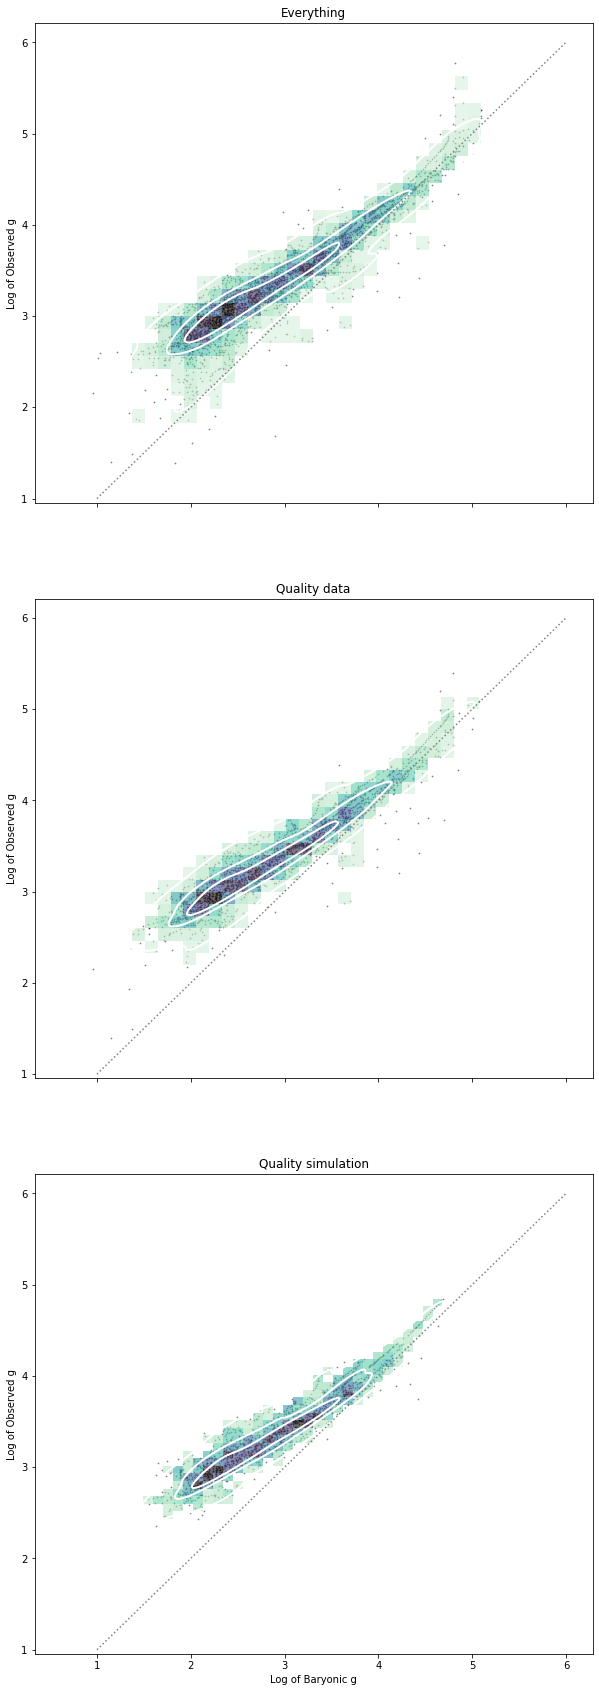

In [6]:
standard = Result(load_sparc(namespace='baseline/201_21'))
g = standard.plot_rar(kind=1)

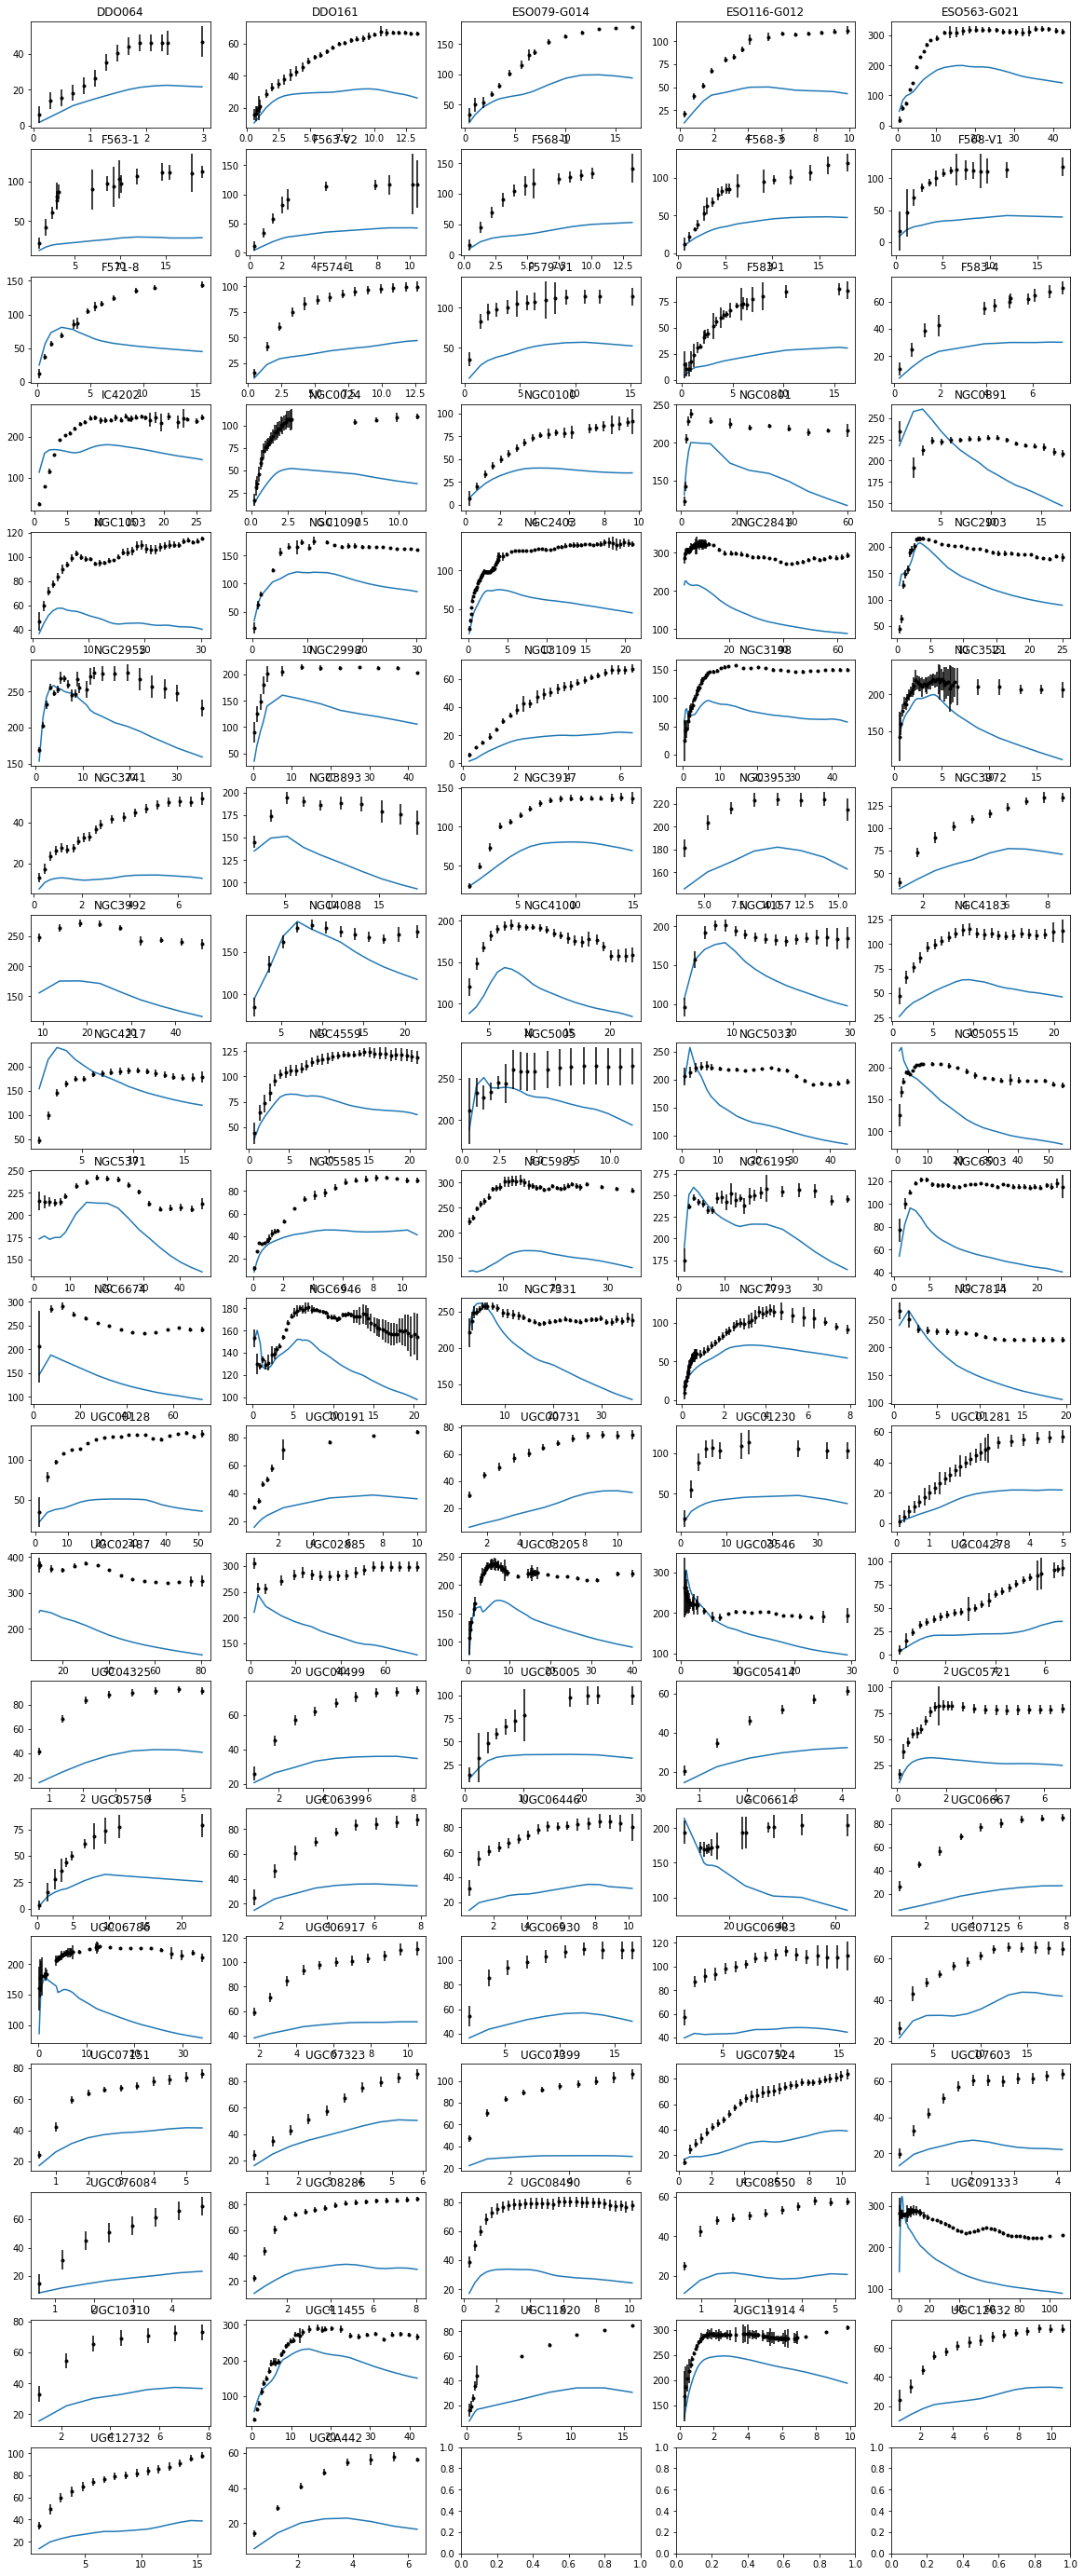

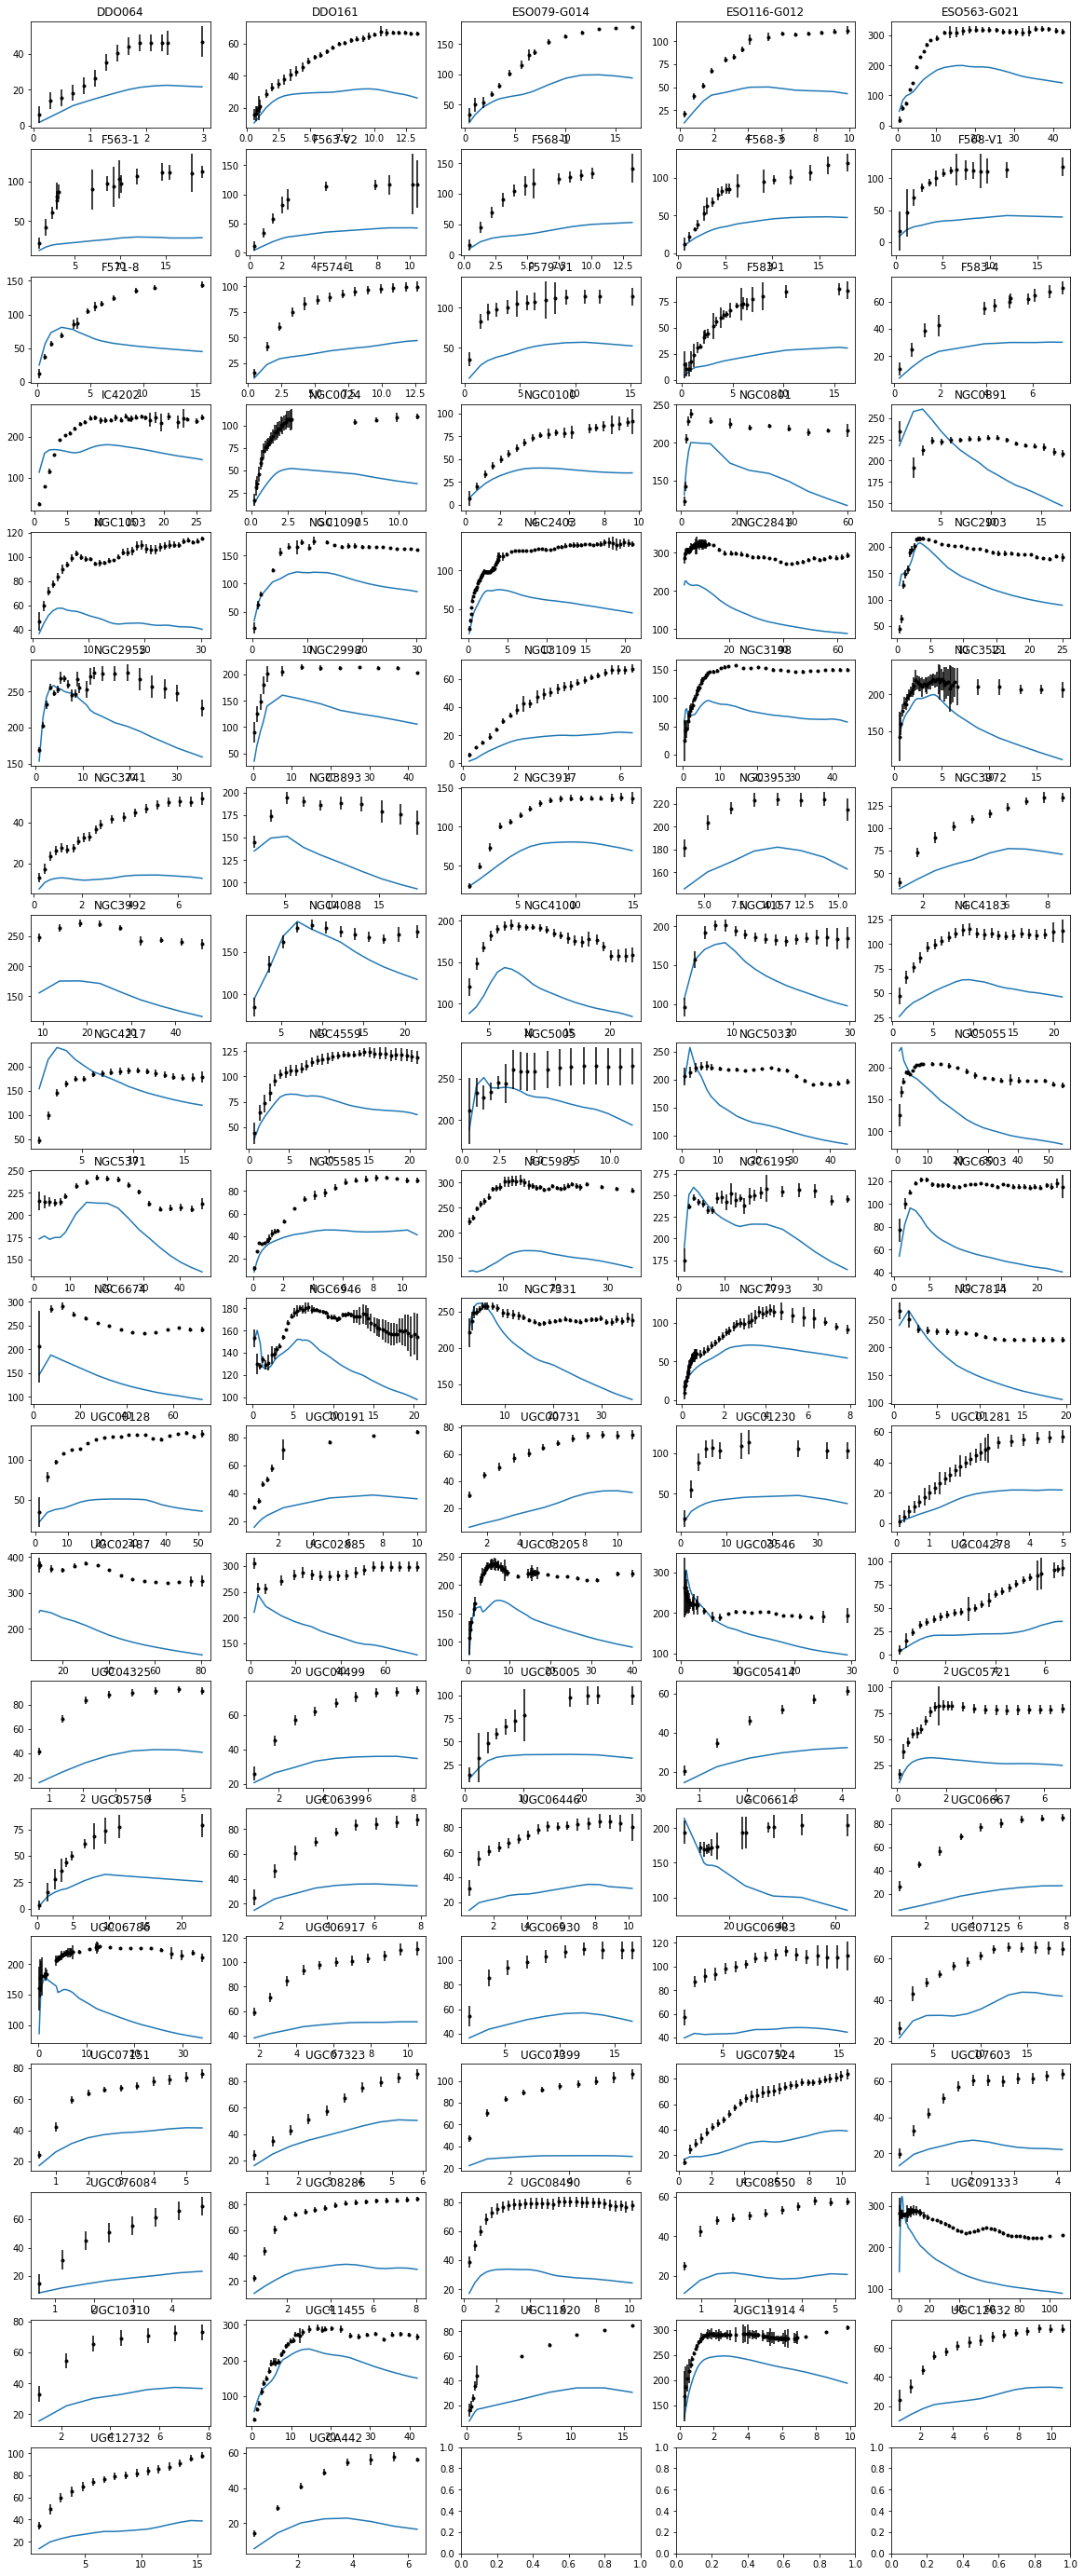

In [3]:
standard.plot_curves()